# Image Display - for viewing a batch of images and optionally taking notes on any images

## Import packages and define helper functions

In [1]:
import cv2
from IPython.display import display, clear_output
from PIL import Image

import os
import json
from datetime import datetime

import random

In [2]:
def get_user_input():
    notes = input("Notes:  ")
    return notes

In [3]:
def save_notes(N):
    timestr = datetime.now().strftime("%m_%d_%Y_%H%M_%S")
    
    outname = f"./Notes_{timestr}.json"
    json.dump(N, open(outname, "w"))
    print(f"Your notes have been saved as: {outname}")
    return

## Next cell is the main driver for viewing images and optionally taking notes.

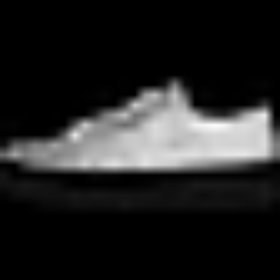

Now showing: img29.png


Notes:   This is an example of taking free-form notes on img29.png
Press any key to continue or 'q' to quit q


Your notes have been saved as: ./Notes_01_20_2021_1544_46.json


In [4]:
Notes = {}

src_imgdir = "./data/"

imgfiles = [i for i in os.listdir(src_imgdir) if i.endswith('.png')]

random.shuffle(imgfiles)

for imgfile in imgfiles:
    img = cv2.imread(f"{src_imgdir}{imgfile}")
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Converting BGR to RGB
    img = cv2.resize(img, (0, 0), fx = 10, fy = 10) 
    
    display(Image.fromarray(img))
    print(f'Now showing: {imgfile}')
    
    notes = get_user_input()
    if notes != '':
        Notes[imgfile] = notes
        
    if input("Press any key to continue or 'q' to quit") != 'q':
        clear_output()
        continue
    else:
        break
    
    clear_output()
    
if len(Notes)>0:
    save_notes(Notes)